In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
# Set random seed
tf.random.set_seed(42)

2022-07-02 17:20:59.514970: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
df_train = pd.read_csv('dataset/basic/train.csv').dropna()
df_test = pd.read_csv('dataset/basic/test.csv').dropna()

In [3]:
X_train = df_train['x'].values
y_train = df_train['y'].values
X_test = df_test['x'].values
y_test = df_test['y'].values

In [4]:
X_train_tensor = tf.constant(X_train)
y_train_tensor = tf.constant(y_train)
X_test_tensor = tf.constant(X_test)
y_test_tensor = tf.constant(y_test)

2022-07-02 17:21:00.979283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-02 17:21:00.985001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-02 17:21:00.985350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-02 17:21:00.986274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

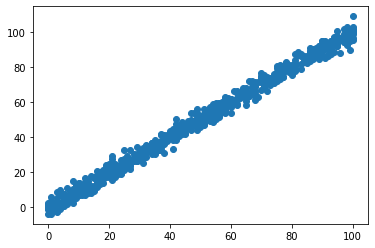

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_train_tensor, y_train_tensor)

In [6]:
X_train_tensor[0], y_train_tensor[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=24.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=21.54945196>)

In [7]:
X_train_tensor.shape, y_train_tensor.shape

(TensorShape([699]), TensorShape([699]))

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mse"])
# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X_train_tensor, axis=-1), y_train_tensor, epochs=100) #(700,) ---> (700, 1)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 12.7361 - mse: 255.6815
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 12.5894 - mse: 227.3688
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 12.7450 - mse: 228.0048
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 12.2027 - mse: 237.4910
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 11.9560 - mse: 227.0982
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 12.1284 - mse: 252.3360
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 11.8329 - mse: 235.0145
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 12.0631 - mse: 217.5796
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 12.6177 - mse: 250.6751
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 12.0927 - mse: 235.8459
Epoch 11/100
22/22 [=========

In [9]:
model.predict([20.0]) 

1/1 [==============================] - 0s 65ms/step


array([[18.28493]], dtype=float32)

In [10]:
# verbose = 0 ==> not show training process
model.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
def plot_predictions(X_train, y_train, X_test, y_test, prediction):
        plt.figure(figsize=(10, 7))
        # Plot training data in blue
        plt.scatter(X_train, y_train, c="b", label="Training data")
        # Plot test data in green
        plt.scatter(X_test, y_test, c="g", label="Testing data")
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(X_test, prediction, c="r", label="Predictions")
        # Show the legend
        plt.legend()

In [13]:
prediction = model.predict(X_test_tensor)

10/10 [==============================] - 0s 2ms/step


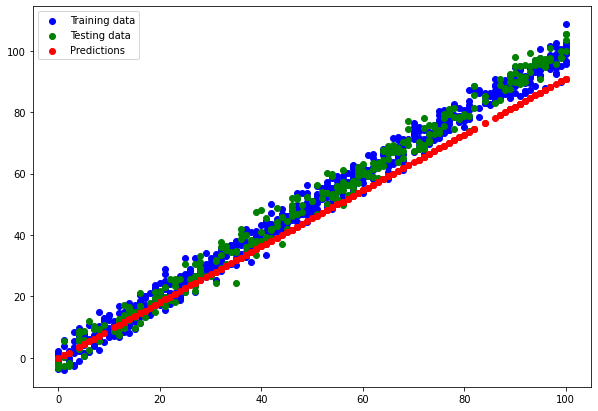

In [15]:
plot_predictions(
    X_train=X_train_tensor,
    y_train=y_train_tensor,
    X_test=X_test_tensor,
    y_test=y_test_tensor,
    prediction=prediction
)

In [16]:
model.evaluate(X_test_tensor, y_test_tensor)

10/10 [==============================] - 0s 1ms/step - loss: 5.4825 - mse: 42.3723


[5.482484340667725, 42.37234878540039]

In [17]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test_tensor, 
                                     y_pred=prediction)
mae

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([28.458525, 35.53989 , 34.98989 , 36.11358 , 28.713795, 39.337566,
       24.849802, 37.84422 , 36.11358 , 47.14174 , 47.991886, 36.707047,
       38.46361 , 24.849802, 28.713795, 39.337566, 25.196325, 40.036896,
       33.11423 , 25.990873, 34.244934, 25.117302, 34.244934, 32.441296,
       39.096027, 24.639938, 29.288525, 35.53989 , 36.615494, 32.441296,
       40.40157 , 30.669683, 29.85088 , 29.713596, 31.972141, 25.740019,
       24.892862, 25.990873, 31.972141, 29.85088 , 35.416958, 26.50702 ,
       25.259737, 28.070976, 47.991886, 28.355019, 26.240105, 25.762312,
       27.37558 , 29.079453, 37.224827, 33.67412 , 24.99367 , 30.669683,
       24.663694, 51.43863 , 27.68867 , 25.070654, 25.990873, 24.6383  ,
       40.758816, 26.787138, 28.070976, 24.772356, 30.601618, 37.34187 ,
       27.08286 , 25.259737, 24.731953, 40.758816, 25.915045, 40.758816,
       29.288525, 24.892862, 39.337566, 31.972141, 30.151329, 25.990873,
   

In [18]:
y_test_tensor.shape, prediction.shape

(TensorShape([300]), (300, 1))

In [20]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=prediction.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.4824843>

In [22]:
prediction.squeeze().shape

(300,)

In [24]:
tf.reduce_mean(tf.abs(y_test-prediction.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=5.4824849792065065>

In [25]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Improve model

In [26]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 12.7361 - mae: 12.7361
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 12.5894 - mae: 12.5894
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 12.7450 - mae: 12.7450
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 12.2027 - mae: 12.2027
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 11.9560 - mae: 11.9560
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 12.1284 - mae: 12.1284
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 11.8329 - mae: 11.8329
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 12.0631 - mae: 12.0631
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 12.6177 - mae: 12.6177
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 12.0927 - mae: 12.0927
Epoch 11/100
22/22 [===================

In [35]:
y_predict_test = model_1.predict(X_test_tensor)

10/10 [==============================] - 0s 941us/step


In [36]:
# Calculate model_1 metrics
mae_1 = mae(y_test_tensor, y_predict_test.squeeze()).numpy()
mse_1 = mse(y_test_tensor, y_predict_test.squeeze()).numpy()
mae_1, mse_1

(5.1108675, 37.19203)

## Model 2

In [39]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train_tensor, axis=-1), y_train_tensor, epochs=100, verbose=0)


In [40]:
y_predict_2 = model_2.predict(X_test_tensor)

10/10 [==============================] - 0s 1ms/step


In [41]:
# Calculate model_2 metrics
mae_2 = mae(y_test_tensor, y_predict_2.squeeze()).numpy()
mse_2 = mse(y_test_tensor, y_predict_2.squeeze()).numpy()
mae_2, mse_2

(13.983737, 281.07346)

In [43]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],]

In [44]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,5.110868,37.192032
1,model_2,13.983737,281.073456


In [45]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [46]:
model_2.save("best_model_HDF5_format.h5")

In [47]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test_tensor, saved_model_preds.squeeze()).numpy() == mae(y_test_tensor, model_2_preds.squeeze()).numpy()

10/10 [==============================] - 0s 745us/step


True

In [49]:
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [50]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

10/10 [==============================] - 0s 830us/step


True